# Project : Holiday weather
by Shubham Tiwari, 13 Jan 2023

In this project I am going to use the historic weather data from the Weather Underground for Delhi to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2023 will be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

# Getting the data
Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

(The following instructions were correct as of 2017. Wunderground has since changed its data provision.)

When the new page opens start typing 'DEL' in the 'Location' input box and when the pop up menu comes up with the option 'DEL, India' select it and then click on 'Submit'.

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page.

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. I have therefore collated the whole 2014 data in the provided 'Delhi_DEL_2014.csv' file.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
from datetime import datetime

In [2]:
delhi = read_csv('Delhi_DEL_2014.csv')

In [3]:
delhi.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1<br />
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
2,2014-1-3,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
3,2014-1-4,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1<br />
4,2014-1-5,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,NaN,0.0,8.0,Snow,-1<br />


# Removing initial spaces
There are too many columns for the dataframe to fit horizontally in this notebook, but they can be displayed separately.

In [4]:
delhi.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees<br />'],
      dtype='object')

This shows that ' Max Gust SpeedKm/h' is prefixed by a space, as are other columm names such as ' Mean Wind SpeedKm/h' and ' Max Sea Level PressurehPa' and so on.

The read_csv() function has interpreted spaces after commas as being part of the next value. This can be rectified easily by adding another argument to the read_csv() function to skip the initial spaces after a comma.

In [5]:
delhi = read_csv('Delhi_DEL_2014.csv', skipinitialspace=True)

# Cleaning the data
Removing extra characters
When the dataset was exported from the Weather Underground web site, HTML line breaks were automatically added to each line in the file which read_csv() has interpreted as part of the column name and its values. This can be seen more clearly by looking at more values in the final column:
First we need to clean up the data.
'WindDirDegrees< br />' can be changed to 'WindDirDegrees' with the rename() method as follows:

In [6]:
delhi = delhi.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

To remove the '< br />' html line breaks from the values in the 'WindDirDegrees' column you need to use the string method rstrip() which is used to remove characters from the end or 'rear' of a string:

In [7]:
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].str.rstrip('<br />')

# Missing values
Missing (also called null or not available) values are marked as NaN (not a number) in dataframes.

The isnull() method returns True for each row in a column that has a null value. The method can be used to select and display those rows. Scroll the table below to the right to check that the events column is only showing missing values.

In [8]:
delhi[delhi['Events'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1
2,2014-1-3,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1
3,2014-1-4,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1
5,2014-1-6,-2,-4,-9,-7,-9,-12,80,67,45,...,10,6,3,14,3,NaN,0.0,8.0,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,8,2,-4,1,-2,-4,91,70,43,...,10,10,10,14,5,NaN,0.0,6.0,NaN,108
361,2014-12-28,10,4,-1,2,1,-2,86,66,46,...,10,10,8,23,5,NaN,0.0,2.0,NaN,190
362,2014-12-29,12,5,-2,2,-1,-3,88,63,38,...,10,10,10,19,8,NaN,0.0,1.0,NaN,162
363,2014-12-30,13,6,-1,2,0,-3,81,60,37,...,10,10,10,14,5,NaN,0.0,1.0,NaN,128


One way to deal with missing values is to replace them by some value. The column method fillna() fills all not available value cells with the value given as argument. In the example below, each missing event is replaced by the empty string.

In [9]:
delhi['Events'] = delhi['Events'].fillna('')
delhi[delhi['Events'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


The empty dataframe (no rows) confirms there are no more missing event values.

Another way to deal with missing values is to ignore rows with them. The dropna() dataframe method returns a new dataframe where all rows with at least one non-available value have been removed.

In [10]:
delhi.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

# Changing the value type of a column
The type of every column in a dataframe can be determined by looking at the dataframe's dtypes attribute, like this:

and change the values in the 'WindDirDegrees' column to float64:

In [11]:
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].astype('float64') 

We definitely need to change the values in the 'Date' column into values of the datetime64 date type.

In [12]:
delhi['Date'] = to_datetime(delhi['Date'])

We also need to change the index from the default to the datetime64 values in the 'Date' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [13]:
delhi.index = delhi['Date']

# Finding a summer break
According to meteorologists, summer extends for the whole months of March, April, May and Mid June in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the datetime index, like this:

In [14]:
summer = delhi.loc[datetime(2014,3,1) : datetime(2014,6,15)]

I now look for the days with warm temperatures.

In [15]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,


Summer 2014 was rather cool in India: there are no days with mean temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [16]:
%matplotlib inline

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

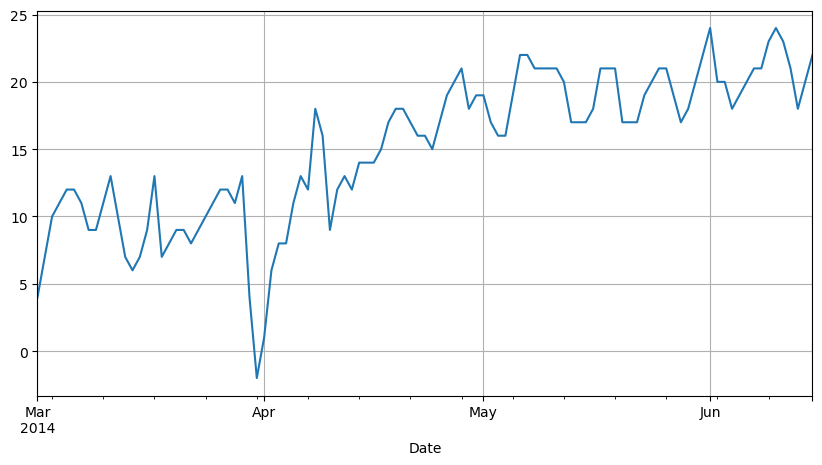

In [17]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the month of May and First of june looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

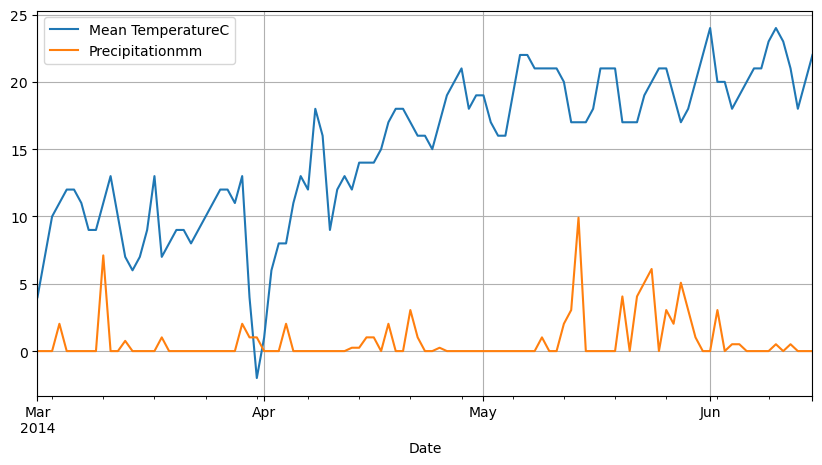

In [18]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second half of May is still looking good, with just a couple of peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for May.

<AxesSubplot:xlabel='Date'>

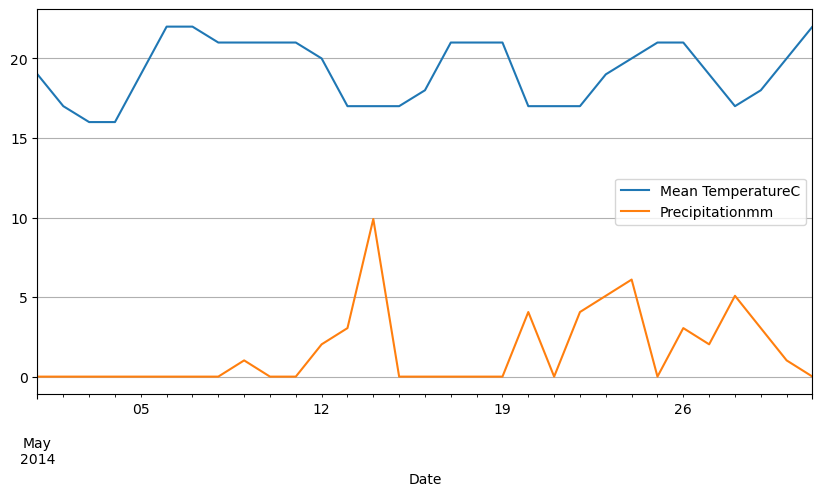

In [19]:
May = summer.loc[datetime(2014,5,1) : datetime(2014,5,31)]
May[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of May looks pretty good, just one day that have significant rain, the 14th and remaining day when the mean temperature drops below 20 degrees.

Now let's plot the Max Wind SpeedKm/h' and 'Mean Wind SpeedKm/h' for the summer:

<AxesSubplot:xlabel='Date'>

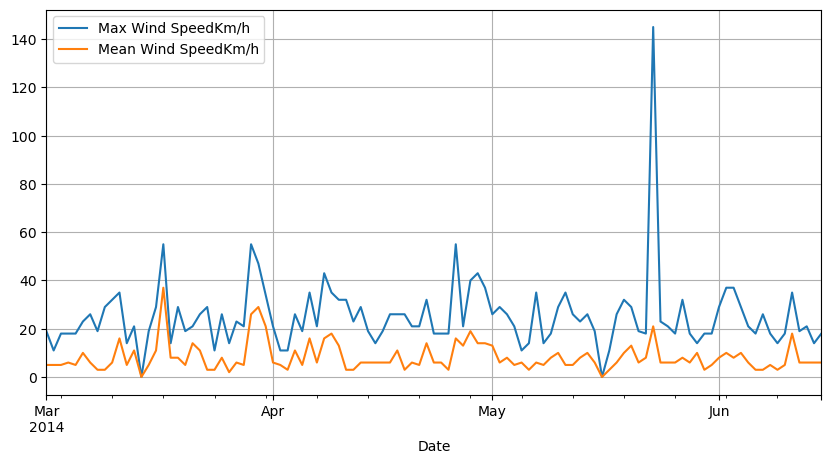

In [20]:
summer[['Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h']].plot(grid=True, figsize=(10,5))

The minimum, mean, and maximum temperature during 2014 in Delhi during summer.

<AxesSubplot:xlabel='Date'>

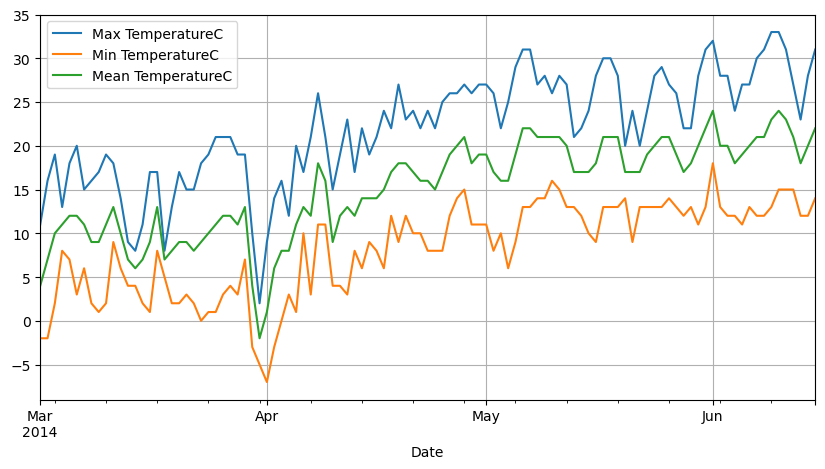

In [21]:
summer[['Max TemperatureC', 'Min TemperatureC', 'Mean TemperatureC']].plot(grid=True, figsize=(10,5))

# Conclusions
The graphs have shown the volatility of a Indian summer, but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. For 2022, I will try to predict two good weather weeks to take off as holiday next winter.